# Exploratory Data analysis on Cardamom Auction Data




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")
dims = (11.7, 8.27)

In [ ]:
df = pd.read_csv("cardamom_auction_data.csv")

In [ ]:
df.head()
df.tail()

,Sno,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
2686,2687,01-May-2015,STATE TRADING CORPORATION,121,20836.0,20623.0,928.0,719.43
2687,2688,14-Jan-2015,The Cardamom Processing & Marketing Co-Operati...,350,76699.0,76699.0,1130.0,861.93
2688,2689,07-Nov-2014,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2689,2690,04-Nov-2014,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2690,2691,04-Nov-2014,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73


In [ ]:
df.shape

(2691, 8)

In [ ]:
 df.columns
# df["Auctioneer"]

Index(['Sno', 'Date of Auction', 'Auctioneer', 'No.of Lots',
       'Total Qty Arrived (Kgs)', 'Qty Sold (Kgs)', 'MaxPrice (Rs./Kg)',
       'Avg.Price (Rs./Kg)'],
      dtype='object')

In [ ]:
df["Avg.Price (Rs./Kg)"].describe()

count    2691.000000
mean     1369.357577
std       867.182303
min         0.000000
25%       797.280000
50%      1016.380000
75%      1510.835000
max      4733.190000
Name: Avg.Price (Rs./Kg), dtype: float64

In [ ]:
df.describe()

,Sno,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
count,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000
mean,1346.000000,245.238201,49553.751319,48031.985210,1700.209959,1369.357577
std,776.969111,112.061057,29435.392546,30296.972043,951.448391,867.182303
min,1.000000,25.000000,4048.600000,0.000000,0.000000,0.000000
25%,673.500000,164.000000,27106.200000,25745.850000,1087.500000,797.280000
50%,1346.000000,236.000000,44768.000000,43154.300000,1310.000000,1016.380000
75%,2018.500000,309.000000,66104.200000,64542.300000,1936.750000,1510.835000
max,2691.000000,790.000000,210080.000000,511177.000000,7000.000000,4733.190000


In [ ]:
df["Auctioneer"].unique()

array(['Header Systems (India) Limited, Nedumkandam',
       'Mas Enterprises, Vandanmettu',
       'THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE SOCIETY LIMITED',
       "Cardamom Planters' Association, Santhanpara",
       'South Indian Green Cardamom Company Ltd, Kochi',
       'Green House Cardamom Mktg.India Pvt. Ltd',
       'Spice More Trading Company, Kumily',
       'Green Cardamom Trading Company',
       'SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd',
       'The Kerala Cardamom Processing and Marketing Company Limited, Thekkady',
       'IDUKKI Dist.TRADITIONAL CARDAMOM PRODUCER COMPANY Ltd',
       'CARDAMOM GROWERSFOREVER PRIVATE LIMITED',
       'VANDANMEDU GREEN GOLD CARDAMOM PRODUCER CoLtd',
       'The Cardamom Processing & Marketing Co-Operative Society Ltd, Kumily',
       'STATE TRADING CORPORATION'], dtype=object)

In [ ]:
df["Auctioneer"].value_counts()
#We have 15 auctioneers and their respective no.of auctions

South Indian Green Cardamom Company Ltd, Kochi                            240
Mas Enterprises, Vandanmettu                                              236
Header Systems (India) Limited, Nedumkandam                               235
The Kerala Cardamom Processing and Marketing Company Limited, Thekkady    232
SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd                             223
IDUKKI Dist.TRADITIONAL CARDAMOM PRODUCER COMPANY Ltd                     222
Green House Cardamom Mktg.India Pvt. Ltd                                  220
VANDANMEDU GREEN GOLD CARDAMOM PRODUCER CoLtd                             214
CARDAMOM GROWERSFOREVER PRIVATE LIMITED                                   214
Cardamom Planters' Association, Santhanpara                               184
THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE SOCIETY LIMITED              163
STATE TRADING CORPORATION                                                 130
Spice More Trading Company, Kumily                              

In [ ]:
#Serial no.seems to be unimportant.Let's drop it
df1=df.drop('Sno', axis='columns')

In [ ]:
#Let's see how everything looks
df1.head()

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,06-Jan-2021,"Header Systems (India) Limited, Nedumkandam",179,47632.5,47414.7,2020.0,1653.78
1,06-Jan-2021,"Mas Enterprises, Vandanmettu",140,34044.8,33302.3,2213.0,1691.46
2,05-Jan-2021,THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...,206,60152.8,59248.3,2092.0,1626.13
3,05-Jan-2021,"Cardamom Planters' Association, Santhanpara",161,30872.7,27759.9,1962.0,1586.01
4,04-Jan-2021,"South Indian Green Cardamom Company Ltd, Kochi",290,82052.4,67921.3,2106.0,1660.35


In [ ]:
#Checking if there is any null values
df1.isnull().sum()

Date of Auction            0
Auctioneer                 0
No.of Lots                 0
Total Qty Arrived (Kgs)    0
Qty Sold (Kgs)             0
MaxPrice (Rs./Kg)          0
Avg.Price (Rs./Kg)         0
dtype: int64

In [ ]:
#Column names looked super messy.Let's change them
df1.columns = ['Date', 'Auctioneer', 'Lots', 'Arrived_Kg', 'Sold_Kg', 'MaxPrice', 'AvgPrice']

In [ ]:
#No null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2691 entries, 0 to 2690
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2691 non-null   object 
 1   Auctioneer  2691 non-null   object 
 2   Lots        2691 non-null   int64  
 3   Arrived_Kg  2691 non-null   float64
 4   Sold_Kg     2691 non-null   float64
 5   MaxPrice    2691 non-null   float64
 6   AvgPrice    2691 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 147.3+ KB


In [ ]:
#I want the data set to be in ascending order of dates.
#Let's clean up date column so that entries will look uniform.
df1["Date"] = pd.to_datetime(df1["Date"])
df2 = df1.sort_values(by="Date")
df2.head(10)

,Date,Auctioneer,Lots,Arrived_Kg,Sold_Kg,MaxPrice,AvgPrice
2690,2014-11-04,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2689,2014-11-04,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2688,2014-11-07,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2687,2015-01-14,The Cardamom Processing & Marketing Co-Operati...,350,76699.0,76699.0,1130.0,861.93
2685,2015-05-01,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,82,10281.0,10132.0,916.0,680.56
2686,2015-05-01,STATE TRADING CORPORATION,121,20836.0,20623.0,928.0,719.43
2683,2015-05-02,Green House Cardamom Mktg.India Pvt. Ltd,211,28950.0,27568.0,846.0,655.47
2684,2015-05-02,"Mas Enterprises, Vandanmettu",277,53507.0,47570.0,990.0,695.96
2681,2015-05-04,IDUKKI Dist.TRADITIONAL CARDAMOM PRODUCER COMP...,123,21246.0,21104.0,964.0,682.17
2682,2015-05-04,"Cardamom Planters' Association, Santhanpara",119,17975.0,17005.0,821.0,663.00


In [ ]:
df2=df2.reset_index(drop =True)
df2.head()

,Date,Auctioneer,Lots,Arrived_Kg,Sold_Kg,MaxPrice,AvgPrice
0,2014-11-04,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
1,2014-11-04,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2,2014-11-07,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
3,2015-01-14,The Cardamom Processing & Marketing Co-Operati...,350,76699.0,76699.0,1130.0,861.93
4,2015-05-01,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,82,10281.0,10132.0,916.0,680.56


In [ ]:
#I wanna see the distribution of different features along different months, different days of the week etc..
#https://www.dataquest.io/blog/python-datetime-tutorial/
Dates = list(df2.Date)
Month = []
Day =[]
Year =[]
for date in Dates :
    Month.append(date.month)
    Year.append(date.year)
    Day.append(date.weekday())
    #Day.append(day)

In [ ]:
#Adding new columns
df2["Month"] = Month
df2["Year"] = Year
df2["Day"] = Day

In [ ]:
# I wanna split this dataset into some small datasets to draw some insights
#Talking with a domain expert I got that first entry is afternoon and second entry is morning after my sorting
#Splitting forenoon and afternoon
morning_df = df2.iloc[1::2].reset_index()

#Splitting forenoon and afternoon
afternoon_df = df2.iloc[0::2].reset_index()
#afternoon_df.head
morning_df.head()

,index,Date,Auctioneer,Lots,Arrived_Kg,Sold_Kg,MaxPrice,AvgPrice,Month,Year,Day
0,1,2014-11-04,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73,11,2014,1
1,3,2015-01-14,The Cardamom Processing & Marketing Co-Operati...,350,76699.0,76699.0,1130.0,861.93,1,2015,2
2,5,2015-05-01,STATE TRADING CORPORATION,121,20836.0,20623.0,928.0,719.43,5,2015,4
3,7,2015-05-02,"Mas Enterprises, Vandanmettu",277,53507.0,47570.0,990.0,695.96,5,2015,5
4,9,2015-05-04,"Cardamom Planters' Association, Santhanpara",119,17975.0,17005.0,821.0,663.00,5,2015,0


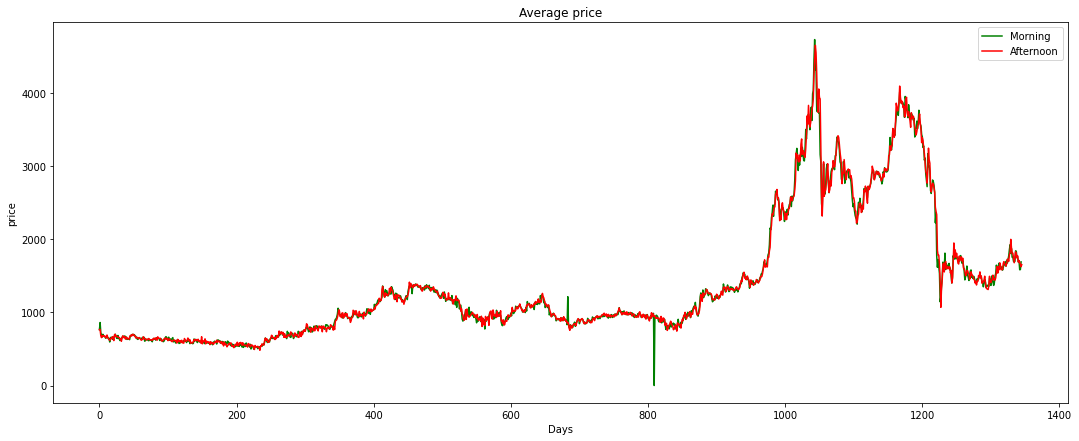

In [ ]:
#Trying to find if morning and afternoon matters a lot 
plt.figure(figsize=(40, 7))
plt.subplot(1,2,1)
plt.plot(morning_df.AvgPrice.values, color='green', label='Morning')
plt.plot(afternoon_df.AvgPrice.values, color='red', label='Afternoon')
plt.title('Average price')
plt.xlabel('Days')
plt.ylabel('price')
plt.legend(loc='best')


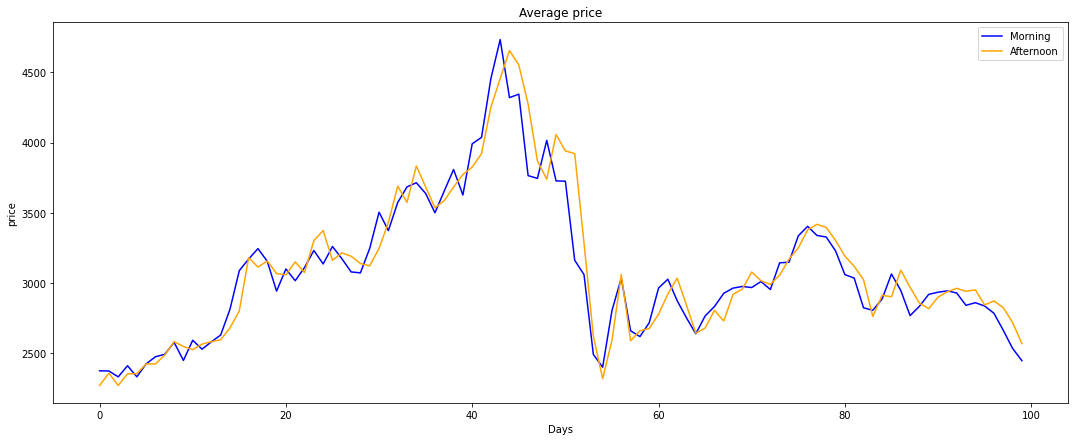

In [ ]:
#Trying to find if morning and afternoon matters a lot 
plt.figure(figsize=(40, 7))
plt.subplot(1,2,1)
plt.plot(morning_df[1000:1100].AvgPrice.values, color='blue', label='Morning')
plt.plot(afternoon_df[1000:1100].AvgPrice.values, color='orange', label='Afternoon')
plt.title('Average price')
plt.xlabel('Days')
plt.ylabel('price')
plt.legend(loc='best')
#Feels a bit congested.Let's look at smaller new time frame

In [ ]:
#Splitting year wise
#First I'm gonna merge records of each day by taking average of prices,arrived,sold and no.of lots.
aggregated_by_date_df = df2.groupby("Date").mean().reset_index()
df_2020=aggregated_by_date_df[aggregated_by_date_df.Year==2020.0].reset_index()
df_2019=aggregated_by_date_df[aggregated_by_date_df.Year==2019.0].reset_index()
df_2018=aggregated_by_date_df[aggregated_by_date_df.Year==2018.0].reset_index()
df_2017=aggregated_by_date_df[aggregated_by_date_df.Year==2017.0].reset_index()
df_2016=aggregated_by_date_df[aggregated_by_date_df.Year==2016.0].reset_index()
#aggregated_by_date_df.head()

,Date,Lots,Arrived_Kg,Sold_Kg,MaxPrice,AvgPrice,Month,Year,Day
0,2014-11-04,477.0,109975.0,109076.0,958.0,765.730,11.0,2014.0,1.0
1,2014-11-07,477.0,109975.0,109076.0,958.0,765.730,11.0,2014.0,4.0
2,2015-01-14,350.0,76699.0,76699.0,1130.0,861.930,1.0,2015.0,2.0
3,2015-05-01,101.5,15558.5,15377.5,922.0,699.995,5.0,2015.0,4.0
4,2015-05-02,244.0,41228.5,37569.0,918.0,675.715,5.0,2015.0,5.0


Text(0.5, 1.0, 'All years-Average price over Months')

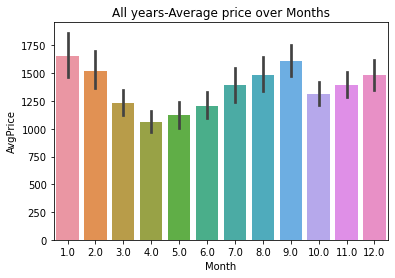

In [ ]:
ax = sns.barplot(y=aggregated_by_date_df['AvgPrice'], x=aggregated_by_date_df['Month'])
ax.set_title("All years-Average price over Months")

Text(0.5, 1.0, 'All year-Average price over weekdays')

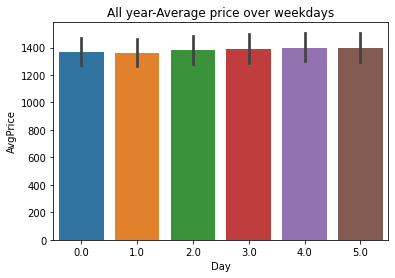

In [ ]:
ax = sns.barplot(y=aggregated_by_date_df['AvgPrice'], x=aggregated_by_date_df['Day'])
ax.set_title("All year-Average price over weekdays")

Text(0.5, 1.0, '2020-Average over weekdays')

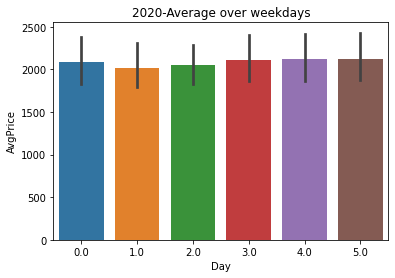

In [ ]:
#2020
ax = sns.barplot(y=df_2020['AvgPrice'], x=df_2020['Day'])
ax.set_title("2020-Average over weekdays")
#,order=["Mon", "Tue","Wed","Thu","Fri","Sat"]

In [ ]:
#I wanna see if thers any pattern yearly

Text(0.5, 1.0, '2020-Average')

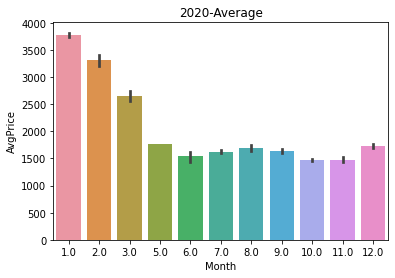

In [ ]:
ax = sns.barplot(y=df_2020['AvgPrice'], x=df_2020['Month'])
ax.set_title("2020-Average")

Text(0.5, 1.0, '2019-Average')

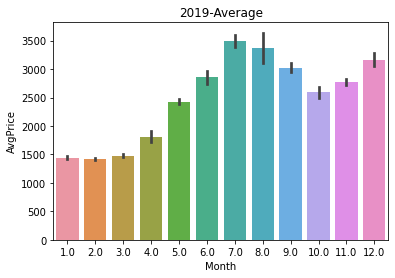

In [ ]:
ax = sns.barplot(y=df_2019['AvgPrice'], x=df_2019['Month'])
ax.set_title("2019-Average")

Text(0.5, 1.0, '2019-Average over Weekdays')

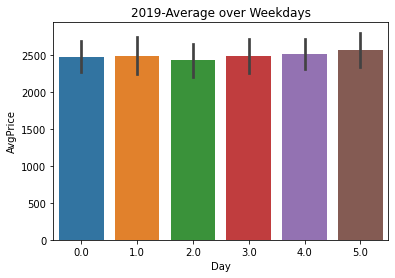

In [ ]:
ax = sns.barplot(y=df_2019['AvgPrice'], x=df_2019['Day'])
ax.set_title("2019-Average over Weekdays")

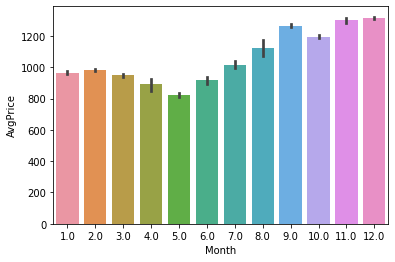

In [ ]:
ax = sns.barplot(y=df_2018['AvgPrice'], x=df_2018['Month'])


Text(0.5, 1.0, '2018-Average over Weekdays')

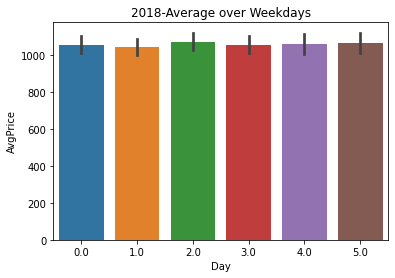

In [ ]:
ax = sns.barplot(y=df_2018['AvgPrice'], x=df_2018['Day'])
ax.set_title("2018-Average over Weekdays")

Text(0.5, 1.0, '2018-Average over Months')

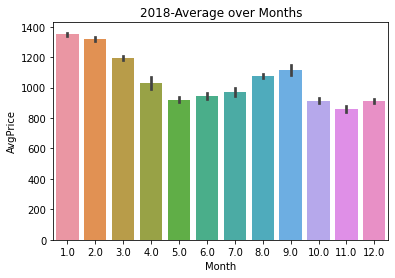

In [ ]:
ax = sns.barplot(y=df_2017['AvgPrice'], x=df_2017['Month'])
ax.set_title("2018-Average over Months")

Text(0.5, 1.0, '2016-Average over Months')

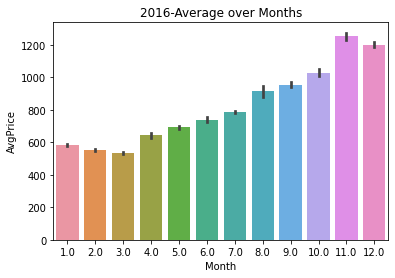

In [ ]:
ax = sns.barplot(y=df_2016['AvgPrice'], x=df_2016['Month'])
ax.set_title("2016-Average over Months")

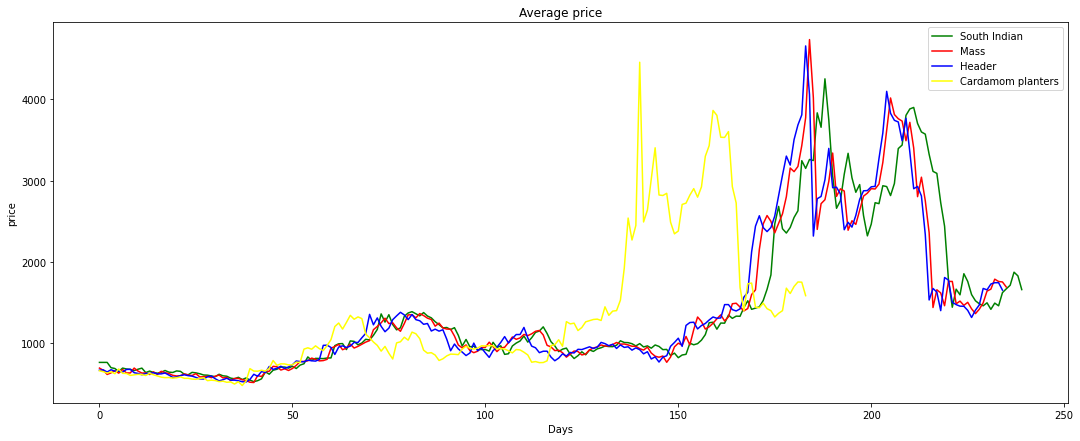

In [ ]:
#Visualizing different Auctioneers
plt.figure(figsize=(40, 7))
plt.subplot(1,2,1)
plt.plot(df2[df2.Auctioneer == 'South Indian Green Cardamom Company Ltd, Kochi'].AvgPrice.values, color='green', label='South Indian')
plt.plot(df2[df2.Auctioneer == 'Mas Enterprises, Vandanmettu'].AvgPrice.values, color='red', label='Mass')
plt.plot(df2[df2.Auctioneer == 'Header Systems (India) Limited, Nedumkandam'].AvgPrice.values, color='blue', label='Header')
#plt.plot(df2[df2.Auctioneer == 'Green Cardamom Trading Company'].AvgPrice.values, color='black', label='Green Cardamom')
plt.plot(df2[df2.Auctioneer == "Cardamom Planters' Association, Santhanpara"].AvgPrice.values, color='yellow', label='Cardamom planters')
plt.title('Average price')
plt.xlabel('Days')
plt.ylabel('price')
plt.legend(loc='best')

In [ ]:
#Looks like all top auctioneers act the same

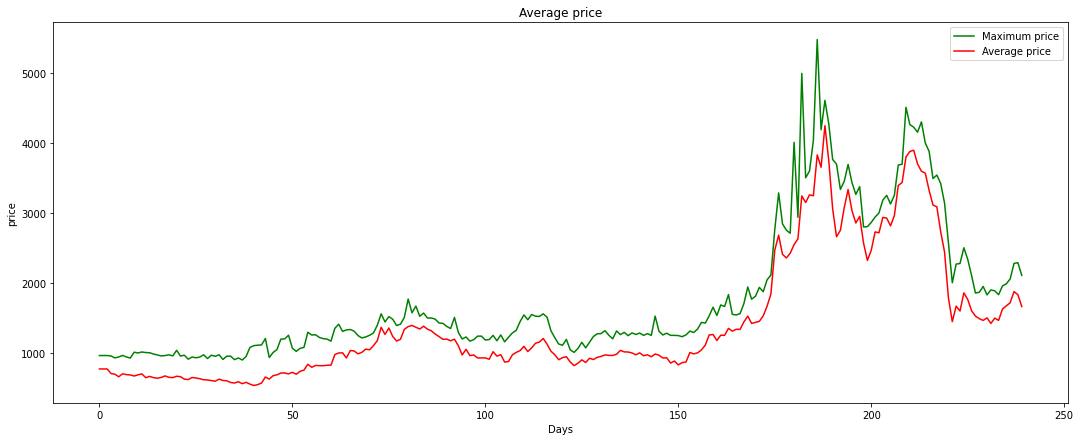

In [ ]:
#Visualizing different Auctioneers over time
plt.figure(figsize=(40, 7));
plt.subplot(1,2,1);
plt.plot(df2[df2.Auctioneer == 'South Indian Green Cardamom Company Ltd, Kochi'].MaxPrice.values, color='green', label='Maximum price')
plt.plot(df2[df2.Auctioneer == 'South Indian Green Cardamom Company Ltd, Kochi'].AvgPrice.values, color='red', label='Average price')
plt.title('Average price')
plt.xlabel('Days')
plt.ylabel('price')
plt.legend(loc='best')

In [ ]:
aggregated_by_auctioneer=df2.groupby("Auctioneer").mean().reset_index()
#https://stackoverflow.com/questions/32059397/pandas-groupby-without-turning-grouped-by-column-into-index

In [ ]:
aggregated_by_auctioneer.columns
aggregated_by_auctioneer.head()


,Auctioneer,Lots,Arrived_Kg,Sold_Kg,MaxPrice,AvgPrice,Month,Year,Day
0,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,217.308411,35279.142991,33283.107944,1632.233645,1318.222991,6.887850,2017.373832,3.495327
1,"Cardamom Planters' Association, Santhanpara",175.891304,29173.726087,26848.306522,1539.271739,1277.032120,6.929348,2017.423913,0.989130
2,Green Cardamom Trading Company,252.350000,63643.975000,85277.215000,2023.700000,1604.204000,9.100000,2020.050000,3.050000
3,Green House Cardamom Mktg.India Pvt. Ltd,148.563636,22490.343182,20741.892727,1559.040909,1300.621636,6.750000,2017.404545,4.118182
4,"Header Systems (India) Limited, Nedumkandam",311.753191,67095.581277,64849.676596,1733.534043,1390.843532,6.706383,2017.468085,1.680851


In [ ]:
aggregated_by_auctioneer1=aggregated_by_auctioneer.sort_values(by='Arrived_Kg',ascending = False)

Text(0.5, 1.0, 'Arrived kgs per auctioneer')

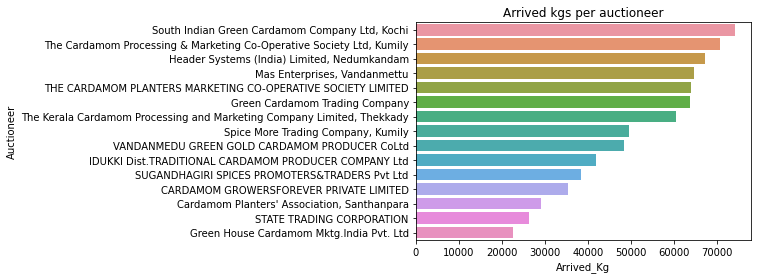

In [ ]:
ax = sns.barplot(y=aggregated_by_auctioneer1['Auctioneer'], x=aggregated_by_auctioneer1['Arrived_Kg'])
ax.set_title("Arrived kgs per auctioneer")

In [ ]:
aggregated_by_auctioneer2=aggregated_by_auctioneer.sort_values(by='AvgPrice',ascending = False)

Text(0.5, 1.0, 'Average price for each auctioneer')

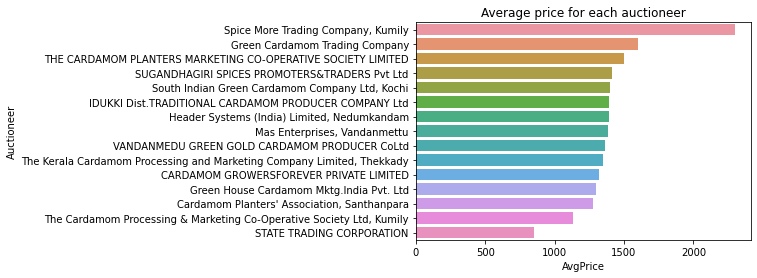

In [ ]:
ax = sns.barplot(y=aggregated_by_auctioneer2['Auctioneer'], x=aggregated_by_auctioneer2['AvgPrice'])
ax.set_title("Average price for each auctioneer")

In [ ]:
#https://towardsdatascience.com/forecasting-prices-for-5-days-ahead-2460406c4ea2

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


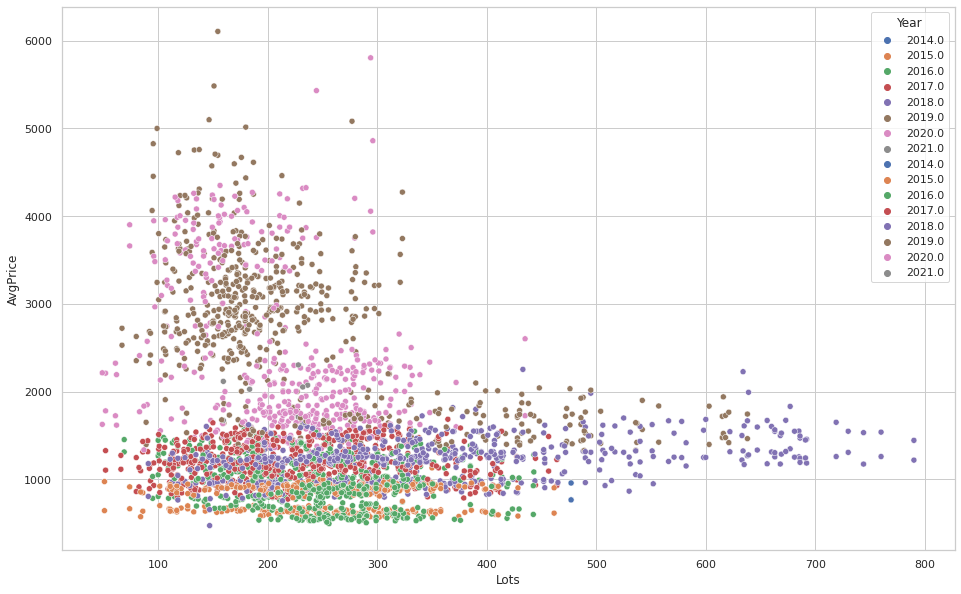

In [ ]:
#Let's try to derive some insights about the correlation between different features.
plt.figure(figsize=(16, 10))
sns.scatterplot(aggregated_by_date_df["Lots"],aggregated_by_date_df["AvgPrice"], hue =aggregated_by_date_df["Year"], palette="deep")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


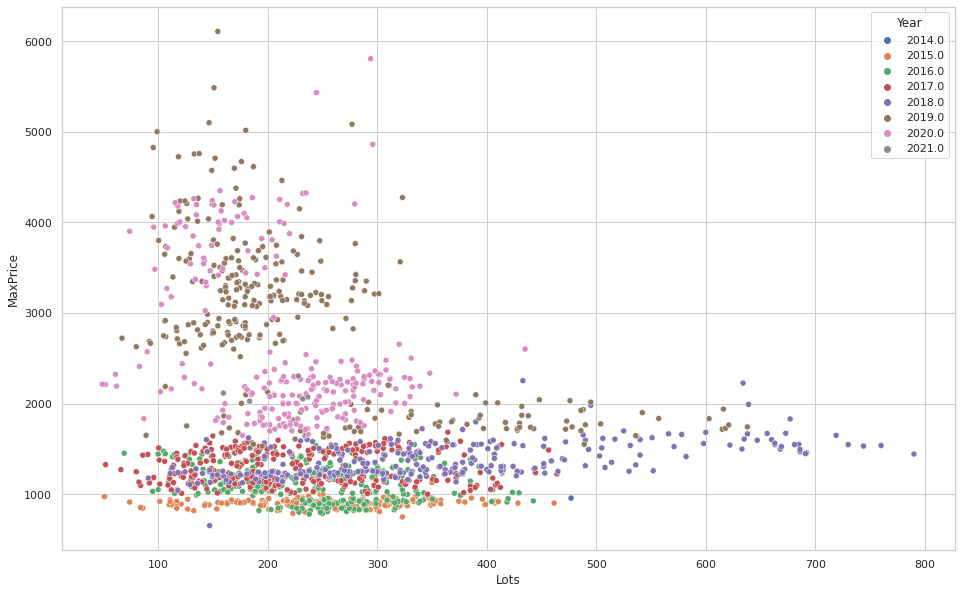

In [ ]:
plt.figure(figsize=(16, 10))
sns.scatterplot(aggregated_by_date_df["Lots"],aggregated_by_date_df["MaxPrice"], hue =aggregated_by_date_df["Year"], palette="deep")

In [ ]:
#sns.swarmplot(aggregated_by_date_df["Lots"],aggregated_by_date_df["AvgPrice"])
#Too many points for swarmplot

In [ ]:
# plt.figure(figsize=(16, 10))
# sns.stripplot(aggregated_by_date_df["Lots"],aggregated_by_date_df["AvgPrice"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

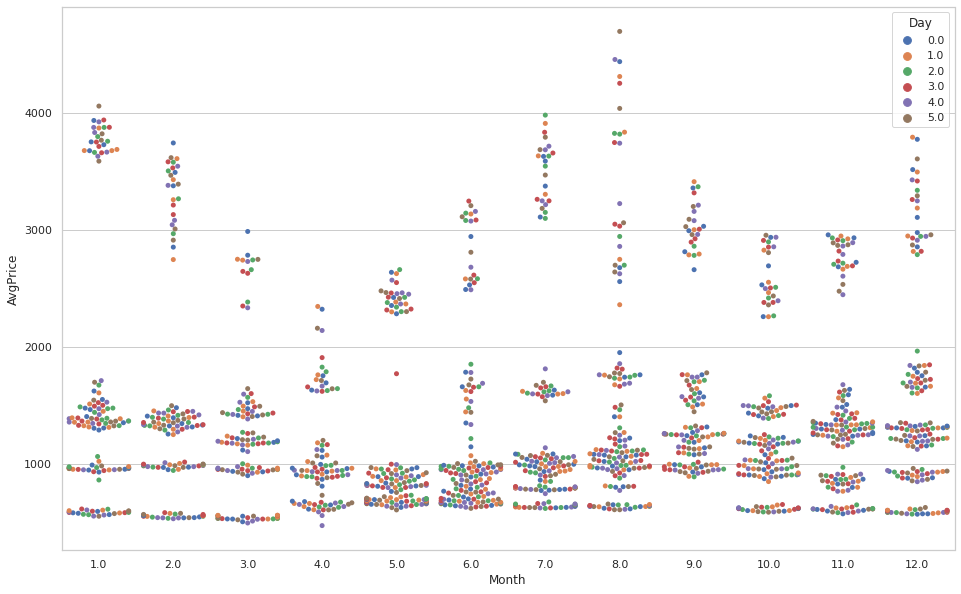

In [ ]:
plt.figure(figsize=(16, 10))
sns.swarmplot(aggregated_by_date_df["Month"],aggregated_by_date_df["AvgPrice"],hue=aggregated_by_date_df["Day"])

In [ ]:
cor = aggregated_by_date_df.corr()

NameError: ignored

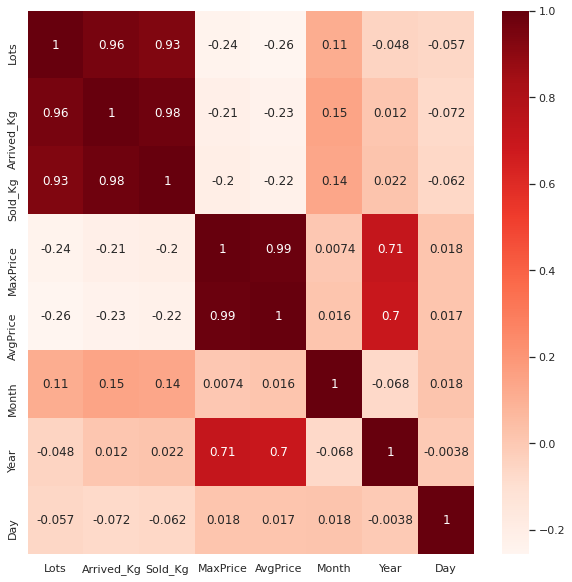

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Selecting highly correlated features
cor_target = abs(cor["AvgPrice"])
relevant_features = cor_target[cor_target>0.2]
relevant_features.drop([MaxPrice,AvgPrice])

NameError: ignored